# Estudo dos dados de vôos brasileiros

Trabalho da disciplina de Estrutura de dados 2 - DCA/UFRN

**Grupo:**


*   Elisa Gabriela Machado de Lucena
*   Vinícius Soares Fernandes


## Instalação dos datasets e das bibliotecas

In [3]:
!pip install nxviz=='0.6.3'
!pip install geocoder==1.38.1
!pip install matplotlib==3.1.3 

!python extract.py
!python transform_to_anac_csv.py
!python transform_to_airports_csv.py
!python transform_to_graphml.py



import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nxviz 0.6.3 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.


  0% 0/23 [00:19<?, ?it/s]
Traceback (most recent call last):
  File "extract.py", line 27, in <module>
    open(filename, 'wb').write(file_response.content)
FileNotFoundError: [Errno 2] No such file or directory: 'data/extract/resumo_anual_2022.csv'
Traceback (most recent call last):
  File "transform_to_anac_csv.py", line 7, in <module>
    combined_csv = pd.concat([pd.read_csv(file, sep=';', encoding='ISO-8859-1') for file in files])
  File "/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py", line 304, in concat
    sort=sort,
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py", line 351, in __init__
    raise ValueError("No objects to concatenate")
ValueError: No objects to concatenate
Traceback (most recent call last):
  File "transform_to_airports_csv.py", line 21, in <module>
    df_anac = pd.read_csv('data

In [4]:
G = nx.read_graphml('air_traffic.graphml')

## Criação do subgrafo do Brasil

In [5]:
brasil_nodes_list = []
for node in G.nodes():
  if G.nodes[node]['country'] == "BRASIL":
    brasil_nodes_list.append(node)

G_br = G.subgraph(brasil_nodes_list)

## Primeiro requisito

**Descrição:** Realizar um estudo sobre a assortatividade da rede considerando como atributo a REGIÃO onde está localizado o aeroporto. Gerar um gráfico similar considerando como grupo a REGIÃO do aeroporto.
<br>
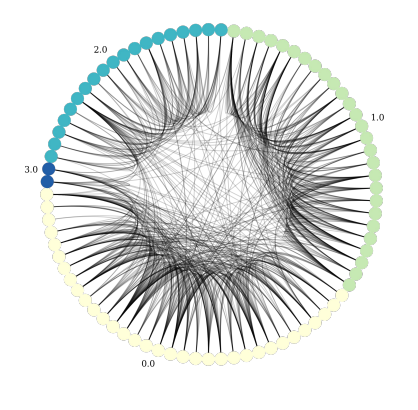

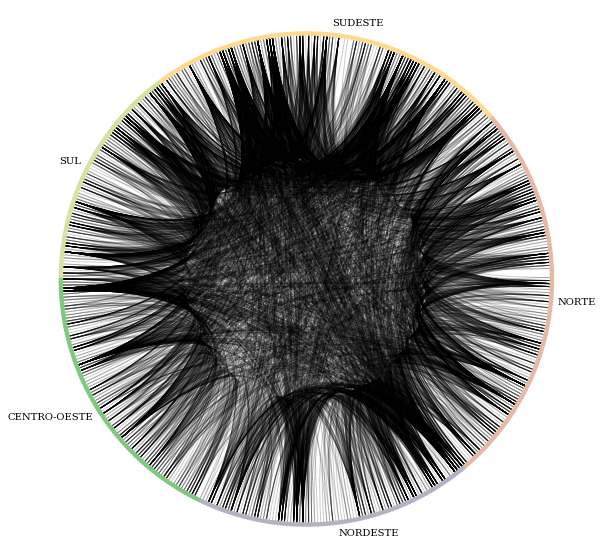

0.37223621972662396

In [6]:
c = nv.CircosPlot(G_br,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(20,10))

c.draw()

plt.savefig("grafico.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()

nx.attribute_assortativity_coefficient(G_br,"region")

## Segundo requisito

**Descrição:** Realizar uma análise bivariada entre o grau do vértice e o número médio de vizinhos.


*   Gerar um gráfico similar considerando a rede do
Brasil e de todas as Regiões (Norte, Nordeste,
Sul, Sudeste e Centro-Oeste).
*   Fazer um relato dos principais achados.

<br>

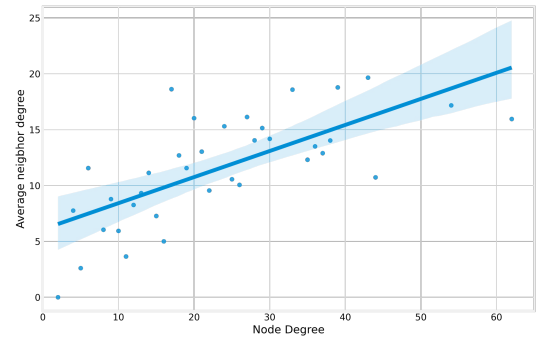

In [7]:
n_nodes_list = []
ne_nodes_list = []
co_nodes_list = []
se_nodes_list = []
s_nodes_list = []

for node in G_br.nodes():
  if G_br.nodes[node]['region'] == "NORTE":
    n_nodes_list.append(node)
    G_n = G_br.subgraph(n_nodes_list)

for node in G_br.nodes():
  if G_br.nodes[node]['region'] == "NORDESTE":
    ne_nodes_list.append(node)
    G_no = G_br.subgraph(ne_nodes_list)

for node in G_br.nodes():
  if G_br.nodes[node]['region'] == "CENTRO-OESTE":
    co_nodes_list.append(node)
    G_co = G_br.subgraph(co_nodes_list)

for node in G_br.nodes():
  if G_br.nodes[node]['region'] == "SUDESTE":
    se_nodes_list.append(node)
    G_se = G_br.subgraph(se_nodes_list)

for node in G_br.nodes():
  if G_br.nodes[node]['region'] == "SUL":
    s_nodes_list.append(node)
    G_s = G_br.subgraph(s_nodes_list)


#Brasil
degree_brasil, avg_neigh_degree_brasil = zip(*nx.average_degree_connectivity(G_br).items())
degree_brasil = list(degree_brasil)
avg_neigh_degree_brasil = list(avg_neigh_degree_brasil)
degree_assortativity_coefficient_brasil = nx.degree_assortativity_coefficient(G_br)

#Norte
degree_regiao_norte, avg_neigh_degree_norte = zip(*nx.average_degree_connectivity(G_n).items())
degree_regiao_norte = list(degree_regiao_norte)
avg_neigh_degree_norte = list(avg_neigh_degree_norte)
degree_assortativity_coefficient_norte = nx.degree_assortativity_coefficient(G_n)

#Nordeste
degree_regiao_nordeste, avg_neigh_degree_nordeste = zip(*nx.average_degree_connectivity(G_no).items())
degree_regiao_nordeste = list(degree_regiao_nordeste)
avg_neigh_degree_nordeste = list(avg_neigh_degree_nordeste)
degree_assortativity_coefficient_nordeste = nx.degree_assortativity_coefficient(G_no)


#Centro-oeste
degree_regiao_centrooeste, avg_neigh_degree_centrooeste = zip(*nx.average_degree_connectivity(G_co).items())
degree_regiao_centrooeste = list(degree_regiao_centrooeste)
avg_neigh_degree_centrooeste = list(avg_neigh_degree_centrooeste)
degree_assortativity_coefficient_centrooeste = nx.degree_assortativity_coefficient(G_co)

#Sudeste
degree_regiao_sudeste, avg_neigh_degree_sudeste = zip(*nx.average_degree_connectivity(G_se).items())
degree_regiao_sudeste = list(degree_regiao_sudeste)
avg_neigh_degree_sudeste = list(avg_neigh_degree_sudeste)
degree_assortativity_coefficient_sudeste = nx.degree_assortativity_coefficient(G_se)

#Sul
degree_regiao_sul, avg_neigh_degree_sul = zip(*nx.average_degree_connectivity(G_s).items())
degree_regiao_sul = list(degree_regiao_sul)
avg_neigh_degree_sul = list(avg_neigh_degree_sul)
degree_assortativity_coefficient_sul = nx.degree_assortativity_coefficient(G_s)


### Gráfico análise bivariada entre o grau do vértice e o número médio de vizinhos - Brasil e regiões

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


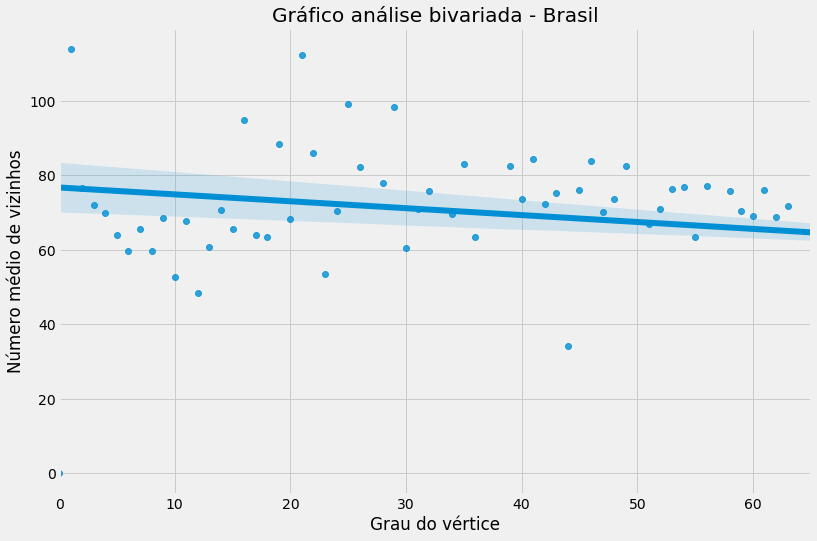

In [8]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

#Brasil
sns.regplot(degree_brasil,avg_neigh_degree_brasil,ax=ax)

ax.set_xlabel("Grau do vértice")
ax.set_ylabel("Número médio de vizinhos")
ax.set_xlim(0,65)
plt.title("Gráfico análise bivariada - Brasil")
plt.show()

### Grau de assortividade da região Norte

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


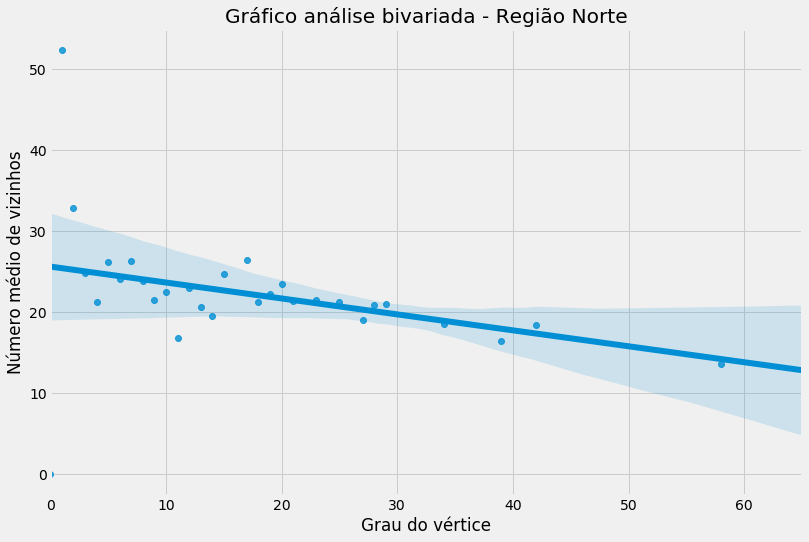

In [9]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

#Norte
sns.regplot(degree_regiao_norte,avg_neigh_degree_norte,ax=ax)

ax.set_xlabel("Grau do vértice")
ax.set_ylabel("Número médio de vizinhos")
ax.set_xlim(0,65)
plt.title("Gráfico análise bivariada - Região Norte")
plt.show()

### Grau de assortividade da região Nordeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


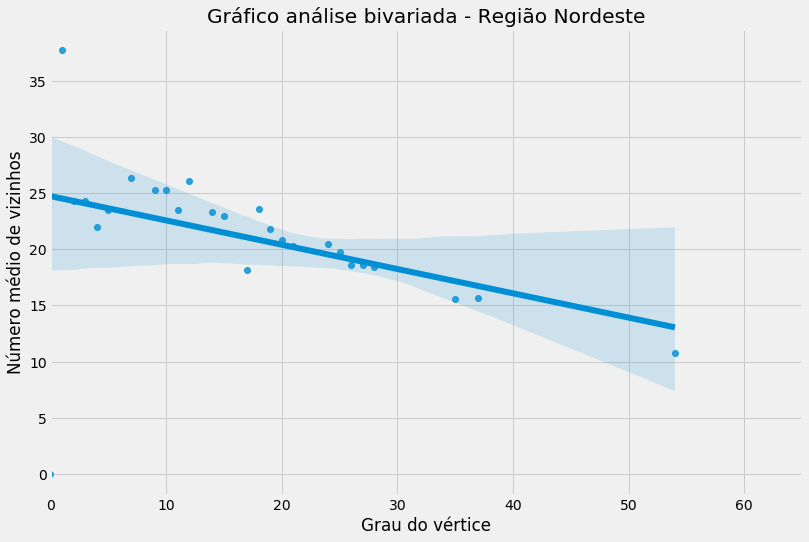

In [10]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_regiao_nordeste,avg_neigh_degree_nordeste,ax=ax)

ax.set_xlabel("Grau do vértice")
ax.set_ylabel("Número médio de vizinhos")
ax.set_xlim(0,65)
plt.title("Gráfico análise bivariada - Região Nordeste")
plt.show()

### Grau de assortividade da região Centro Oeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


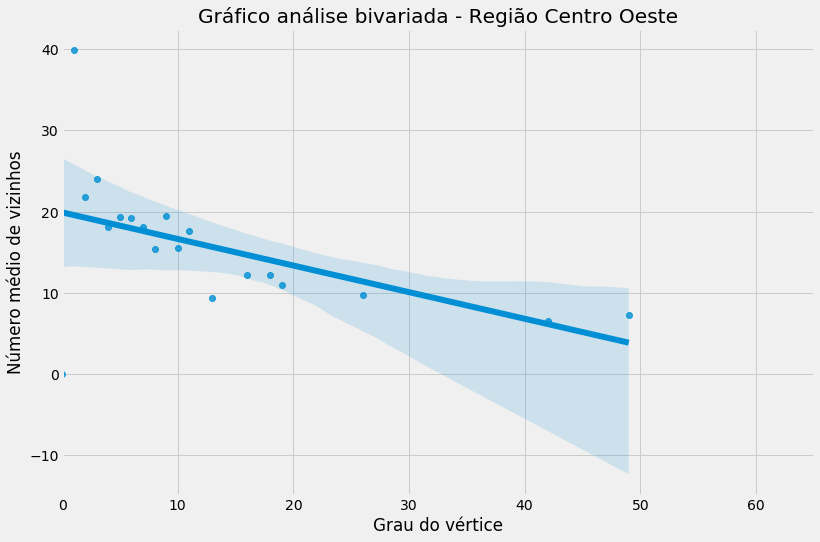

In [11]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_regiao_centrooeste,avg_neigh_degree_centrooeste,ax=ax)

ax.set_xlabel("Grau do vértice")
ax.set_ylabel("Número médio de vizinhos")
ax.set_xlim(0,65)
plt.title("Gráfico análise bivariada - Região Centro Oeste")
plt.show()

### Grau de assortividade da região Sudeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


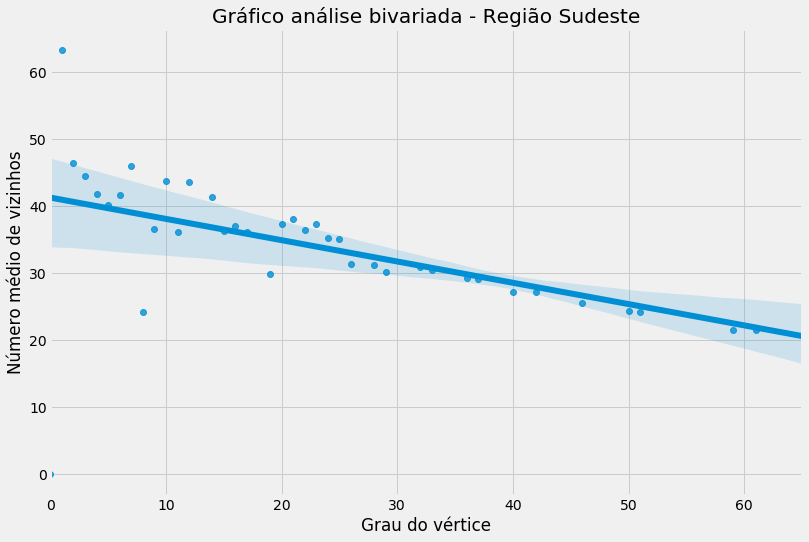

In [12]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_regiao_sudeste,avg_neigh_degree_sudeste,ax=ax)

ax.set_xlabel("Grau do vértice")
ax.set_ylabel("Número médio de vizinhos")
ax.set_xlim(0,65)
plt.title("Gráfico análise bivariada - Região Sudeste")
plt.show()

### Grau de assortividade da região Sul

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


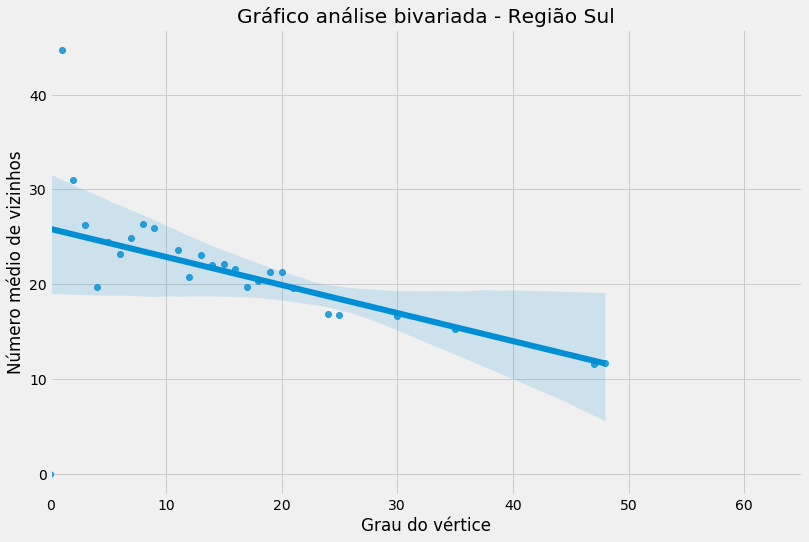

In [13]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree_regiao_sul,avg_neigh_degree_sul,ax=ax)

ax.set_xlabel("Grau do vértice")
ax.set_ylabel("Número médio de vizinhos")
ax.set_xlim(0,65)
plt.title("Gráfico análise bivariada - Região Sul")
plt.show()

## Terceiro requisito

**Descrição:** Quantos componentes conectados existem na malha aérea brasileira? Caracterize cada componente: quantidade, porcentagem por região.

In [14]:
#Para achar a quantidade de componentes conectados existentes na malha aérea brasileira
print("Quantidade de componenetes conectados existentes na malha aérea brasileira: ", + nx.number_connected_components(G_br))

Quantidade de componenetes conectados existentes na malha aérea brasileira:  6


In [15]:
def component_information(component):
  regioes = {"NORTE": 0, "NORDESTE": 0, "CENTRO-OESTE": 0, "SUL": 0, "SUDESTE": 0}
  for node in component:
    region = G_br.nodes[node]['region']
    if region in regioes:
      regioes[region] += 1
    else:
      regioes[region] = 0
  print(regioes)  

  N = regioes['NORTE']
  NE = regioes['NORDESTE']
  CO = regioes['CENTRO-OESTE']
  SE = regioes['SUDESTE']
  S = regioes['SUL']

  total = N + NE + CO + SE + S
  print("Região Sul: \n componentes connectados:", + S, "\n Porcentagem de componentes connectados", + S*100/total)
  print("Região Sudeste: \n componentes connectados:", + SE, "\n Porcentagem de componentes connectados", + SE*100/total)
  print("Região Centro-Oeste: \n componentes connectados:", + CO, "\n Porcentagem de componentes connectados", + CO*100/total)
  print("Região Norte: \n componentes connectados:", + N, "\n Porcentagem de componentes connectados", + N*100/total)
  print("Região Nordeste: \n componentes connectados:", + NE, "\n Porcentagem de componentes connectados", + NE*100/total)

  print("\n")

In [16]:
for component in nx.connected_components(G_br):
  component_information(component)

{'NORTE': 126, 'NORDESTE': 92, 'CENTRO-OESTE': 90, 'SUL': 74, 'SUDESTE': 118}
Região Sul: 
 componentes connectados: 74 
 Porcentagem de componentes connectados 14.8
Região Sudeste: 
 componentes connectados: 118 
 Porcentagem de componentes connectados 23.6
Região Centro-Oeste: 
 componentes connectados: 90 
 Porcentagem de componentes connectados 18.0
Região Norte: 
 componentes connectados: 126 
 Porcentagem de componentes connectados 25.2
Região Nordeste: 
 componentes connectados: 92 
 Porcentagem de componentes connectados 18.4


{'NORTE': 0, 'NORDESTE': 0, 'CENTRO-OESTE': 0, 'SUL': 0, 'SUDESTE': 1}
Região Sul: 
 componentes connectados: 0 
 Porcentagem de componentes connectados 0.0
Região Sudeste: 
 componentes connectados: 1 
 Porcentagem de componentes connectados 100.0
Região Centro-Oeste: 
 componentes connectados: 0 
 Porcentagem de componentes connectados 0.0
Região Norte: 
 componentes connectados: 0 
 Porcentagem de componentes connectados 0.0
Região Nordeste: 
 compone

## Quarto requisito

**Descrição:** Realizar um estudo sobre o Coeficiente de Clustering considerando a Rede da Malha Aérea Nacional, assim como as sub-redes aéreas de
cada Região (Norte, Nordeste, Centro-Oeste, Sul e Sudeste).

In [17]:
nx.triangles(G_br)
nx.clustering(G_br)
nx.average_clustering(G_br)

0.6310139004172536

### Coeficiente de Clustering considerando as subredes

In [18]:
nodes = (
    node
    for node, data
    in G_br.nodes(data=True)
    if data.get("region") == "NORDESTE"
)
subgraph_nordeste = G_br.subgraph(nodes)
subgraph_nordeste.nodes 

print("Coeficiente de Clustering - Região Nordeste: ", + nx.average_clustering(subgraph_nordeste))

nodes = (
    node
    for node, data
    in G_br.nodes(data=True)
    if data.get("region") == "SUL"
)
subgraph_sul = G_br.subgraph(nodes)
subgraph_sul.nodes 

print("Coeficiente de Clustering - Região Sul: ", + nx.average_clustering(subgraph_sul))

nodes = (
    node
    for node, data
    in G_br.nodes(data=True)
    if data.get("region") == "SUDESTE"
)
subgraph_sudeste = G_br.subgraph(nodes)
subgraph_sudeste.nodes 

print("Coeficiente de Clustering - Região Sudeste: ", + nx.average_clustering(subgraph_sudeste))

nodes = (
    node
    for node, data
    in G_br.nodes(data=True)
    if data.get("region") == "CENTRO-OESTE"
)
subgraph_centrooeste = G_br.subgraph(nodes)
subgraph_centrooeste.nodes 

print("Coeficiente de Clustering - Região Centro-Oeste: ", + nx.average_clustering(subgraph_centrooeste))

nodes = (
    node
    for node, data
    in G_br.nodes(data=True)
    if data.get("region") == "NORTE"
)
subgraph_norte = G_br.subgraph(nodes)
subgraph_nordeste.nodes 

print("Coeficiente de Clustering - Região Norte: ", + nx.average_clustering(subgraph_norte))

Coeficiente de Clustering - Região Nordeste:  0.4719877188787716
Coeficiente de Clustering - Região Sul:  0.6010959892377783
Coeficiente de Clustering - Região Sudeste:  0.6090521139296871
Coeficiente de Clustering - Região Centro-Oeste:  0.5652821004267259
Coeficiente de Clustering - Região Norte:  0.6134444520831854
